In [49]:
import sys
sys.path.append('..')

In [50]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
from polimorfo.datasets import CocoDataset, SemanticCoco
import matplotlib.pyplot as plt
from polimorfo.utils import maskutils
import numpy as np
from skimage import measure

In [52]:
ds = SemanticCoco('../../car-models/datasets/carparts_cropped_all/train_carparts_dataset.json')

load annotations: 100%|██████████| 111876/111876 [00:00<00:00, 1191683.23it/s]


<AxesSubplot:title={'center':'batch2___ID_2007-renault-scenic-dynamique-vvt-207520___images___image_4.jpg'}>

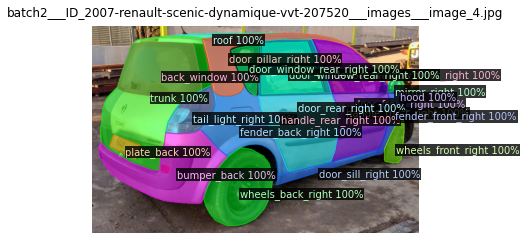

In [53]:
ds.show_image(show_masks=True, show_boxes=False)

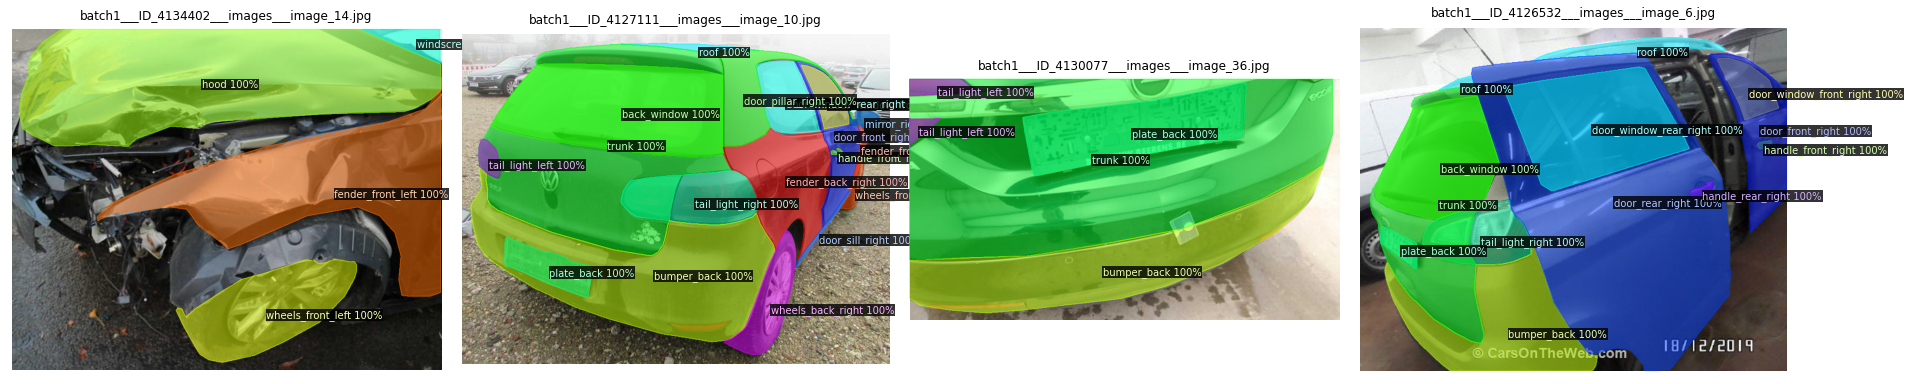

In [54]:
fig = ds.show_images([481, 125, 101, 74])

In [55]:
masks = ds.get_segmentation_mask(481)

<AxesSubplot:title={'center':'batch1___ID_4134402___images___image_14.jpg'}>

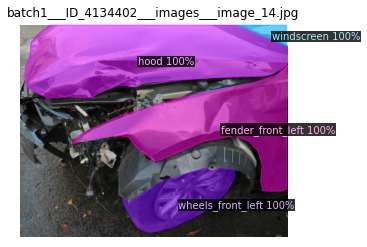

In [56]:
ds.show_image(481)

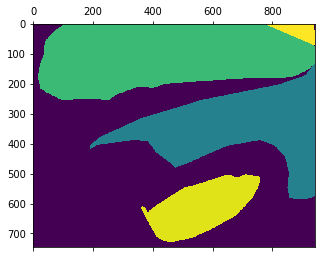

In [57]:
plt.matshow(masks)

In [58]:
ds.cats

{1: {'supercategory': 'thing', 'id': 1, 'name': 'back_window'},
 2: {'supercategory': 'thing', 'id': 2, 'name': 'bumper_back'},
 3: {'supercategory': 'thing', 'id': 3, 'name': 'bumper_front'},
 4: {'supercategory': 'thing', 'id': 4, 'name': 'door_front_left'},
 5: {'supercategory': 'thing', 'id': 5, 'name': 'door_front_right'},
 6: {'supercategory': 'thing', 'id': 6, 'name': 'door_pillar_left'},
 7: {'supercategory': 'thing', 'id': 7, 'name': 'door_pillar_right'},
 8: {'supercategory': 'thing', 'id': 8, 'name': 'door_rear_left'},
 9: {'supercategory': 'thing', 'id': 9, 'name': 'door_rear_right'},
 10: {'supercategory': 'thing', 'id': 10, 'name': 'door_sill_left'},
 11: {'supercategory': 'thing', 'id': 11, 'name': 'door_sill_right'},
 12: {'supercategory': 'thing', 'id': 12, 'name': 'door_window_front_left'},
 13: {'supercategory': 'thing', 'id': 13, 'name': 'door_window_front_right'},
 14: {'supercategory': 'thing', 'id': 14, 'name': 'door_window_rear_left'},
 15: {'supercategory': 'th

compute the stats for the images

In [59]:
import dataclasses
from dataclasses import dataclass
import numpy as np

In [60]:
def compute_imgs_stats(cat_id):
    areas = []
    for img_idx in ds.index.catidx_to_imgidxs[cat_id]:
        img_meta = ds.imgs[img_idx]
        areas.append(img_meta['width'] * img_meta['height'])
    return np.percentile(areas, [0, 25, 50, 75, 100])

def compute_cat_stats(cat_id):
    areas = []
    for ann_idx in ds.index.catidx_to_annidxs[cat_id]:
        ann = ds.anns[ann_idx]
        areas.append(ann['area'])
    return np.percentile(areas, [0, 25, 50, 75, 100])

In [61]:
out_idx_dict = dict()
out_catname_dict = dict()

np.set_printoptions(suppress=True)
for idx, cat_meta in ds.cats.items():
    print(cat_meta['name'])
    imgs_stats = compute_imgs_stats(idx)
    cat_stats = compute_cat_stats(idx)
    print('image', imgs_stats)
    print('cats', cat_stats)
    print('mean_ratio', ((cat_stats / imgs_stats)))
    print('--------------')
    out_catname_dict[cat_meta['name']] = round((cat_stats / imgs_stats)[3],3)
    out_idx_dict[idx] = round((cat_stats / imgs_stats)[3],3)

back_window
image [  51273.    194488.25  239112.    374943.   3000000.  ]
cats [   1170.   18240.   28569.   45144. 1107195.]
mean_ratio [0.02281903 0.09378459 0.11947957 0.1204023  0.369065  ]
--------------
bumper_back
image [  51273.  200288.  254694.  399993. 3000000.]
cats [     40.     38345.25   68548.5   118346.25 2496960.  ]
mean_ratio [0.00078014 0.19145056 0.26914062 0.2958708  0.83232   ]
--------------
bumper_front
image [  67032.  204000.  265370.  422928. 3000000.]
cats [     48.   44255.   79600.  139527. 2101760.]
mean_ratio [0.00071608 0.21693627 0.29995855 0.32990722 0.70058667]
--------------
door_front_left
image [  76302.  207332.  265088.  410462. 3000000.]
cats [    276.    16905.5   28531.    60882.  2886408. ]
mean_ratio [0.00361721 0.08153831 0.10762841 0.14832555 0.962136  ]
--------------
door_front_right
image [  67032.    209863.    269952.    415839.75 3000000.  ]
cats [    144.   17670.   30302.   65511. 2972513.]
mean_ratio [0.00214823 0.08419779 0.11

In [84]:
out_catname_dict['wheel_rear_right'] = out_catname_dict['wheels_back_right']
del out_catname_dict['wheels_back_right']

In [85]:
out_catname_dict

{'bumper_back': 0.296,
 'bumper_front': 0.33,
 'door_front_left': 0.148,
 'door_front_right': 0.158,
 'door_pillar_left': 0.08,
 'door_pillar_right': 0.081,
 'door_rear_left': 0.159,
 'door_rear_right': 0.162,
 'door_window_front_left': 0.032,
 'door_window_front_right': 0.035,
 'door_window_rear_left': 0.031,
 'door_window_rear_right': 0.031,
 'fender_front_left': 0.117,
 'fender_front_right': 0.125,
 'handle_front_left': 0.001,
 'handle_front_right': 0.002,
 'handle_rear_left': 0.002,
 'handle_rear_right': 0.002,
 'headlight_left': 0.055,
 'headlight_right': 0.053,
 'hood': 0.208,
 'mirror_left': 0.01,
 'mirror_right': 0.01,
 'plate_back': 0.029,
 'plate_front': 0.025,
 'radiator_grill': 0.064,
 'roof': 0.031,
 'wheels_front_left': 0.068,
 'wheels_front_right': 0.067,
 'windscreen': 0.111,
 'back_side': 0.294,
 'window_back': 0.12,
 'sill_left': 0.068,
 'sill_right': 0.075,
 'fender_rear_left': 0.156,
 'fender_rear_right': 0.14,
 'foglight_left': 0.005,
 'foglight_right': 0.005,
 'ta

In [44]:
import json

In [86]:
with open('name_avgarea_dict.json', 'w') as f:
    json.dump(out_catname_dict, f)

In [88]:
idx_carpart_dict = {
  "1": "window_back",
  "2": "bumper_back",
  "3": "bumper_front",
  "4": "door_front_left",
  "5": "door_front_right",
  "6": "pillar_left",
  "7": "pillar_right",
  "8": "door_rear_left",
  "9": "door_rear_right",
  "10": "sill_left",
  "11": "sill_right",
  "12": "door_window_front_left",
  "13": "door_window_front_right",
  "14": "door_window_rear_left",
  "15": "door_window_rear_right",
  "16": "fender_rear_left",
  "17": "fender_rear_right",
  "18": "fender_front_left",
  "19": "fender_front_right",
  "20": "foglight_left",
  "21": "foglight_right",
  "22": "handle_front_left",
  "23": "handle_front_right",
  "24": "handle_rear_left",
  "25": "handle_rear_right",
  "26": "headlight_left",
  "27": "headlight_right",
  "28": "hood",
  "29": "mirror_left",
  "30": "mirror_right",
  "31": "plate_back",
  "32": "plate_front",
  "33": "radiator_grill",
  "34": "roof",
  "35": "taillight_left",
  "36": "taillight_right",
  "37": "wheel_rear_left",
  "38": "wheel_rear_right",
  "39": "wheels_front_left",
  "40": "wheels_front_right",
  "41": "windscreen",
  "42": "back_side"
}

In [89]:
carpart_idx_dict = {v:int(k) for k,v in idx_carpart_dict.items()}

In [90]:
carpart_idx_dict

{'window_back': 1,
 'bumper_back': 2,
 'bumper_front': 3,
 'door_front_left': 4,
 'door_front_right': 5,
 'pillar_left': 6,
 'pillar_right': 7,
 'door_rear_left': 8,
 'door_rear_right': 9,
 'sill_left': 10,
 'sill_right': 11,
 'door_window_front_left': 12,
 'door_window_front_right': 13,
 'door_window_rear_left': 14,
 'door_window_rear_right': 15,
 'fender_rear_left': 16,
 'fender_rear_right': 17,
 'fender_front_left': 18,
 'fender_front_right': 19,
 'foglight_left': 20,
 'foglight_right': 21,
 'handle_front_left': 22,
 'handle_front_right': 23,
 'handle_rear_left': 24,
 'handle_rear_right': 25,
 'headlight_left': 26,
 'headlight_right': 27,
 'hood': 28,
 'mirror_left': 29,
 'mirror_right': 30,
 'plate_back': 31,
 'plate_front': 32,
 'radiator_grill': 33,
 'roof': 34,
 'taillight_left': 35,
 'taillight_right': 36,
 'wheel_rear_left': 37,
 'wheel_rear_right': 38,
 'wheels_front_left': 39,
 'wheels_front_right': 40,
 'windscreen': 41,
 'back_side': 42}

In [91]:
with open('carpart_idx_dict.json', 'w') as f:
    json.dump(carpart_idx_dict,f)

In [92]:
!open .